# Perceptual decision making (1)
In this section, let's first simulate a simple perceptual model

## A simple perceptual decision model
Suppose the motion stimulus contains $N=100$ dots. As an observer, we view $T=2$ frames of the motion stimulus。We assume that the observer makes a binary direction (i.e., left/right) choice based on counting how many dots moving towards left/right. 

To simulate the choice, we count the number of dots moving to the correct direction.

Suppose $coh$ is the percent of dots coherently moving to the correct direction. The other $1-coh$ dots move to left or right randomly in each frame. Thus, in each frame, the fraction of dots (i.e., $f$) moving to the correct direction is

$$
f = coh + \frac{1-coh}{2}=\frac{coh}{2}+\frac{1}{2}
$$

In [1]:
# This notebook requies the following python packages

# pip install numpy scipy matplotib

In [1]:
import numpy as np

T = 2 # how many frames of the stimulus
D = 100 # How many dots in total
f = 0.51 # fraction of dots moving to the correct direction

Now we calculate how many dots moving to the correct/incorrect directions in the end, and compare them to make a decision

We use the Bernoulli distritbuion to simulate the random binary direction choices, similar to a coin-flip process

In [2]:
from scipy.stats import bernoulli

In [8]:
N_correct = 0
N_wrong = 0
for i in range(T*D): # loop dots and frame
    dir = bernoulli.rvs(f, size=1)
    N_correct = N_correct + dir # dots to correct + 1 
    N_wrong = N_wrong + (1-dir) # dots to incorrect + 1

if N_correct > N_wrong:
    choice = 1 # we make a correct response in this trial
elif N_correct < N_wrong:
    choice = 0 # we make an incorrect response in this trial
else:
    choice = bernoulli.rvs(0.5, size=1)

print(choice)

1


Above code simulate a simple choice in a trial. But in real experiments, we typically set many trials and manipulate coherence level (i.e., $coh$ or $f$) and stimulus duration (i.e., $T$ number of frames).

We now consider to write a simple choice into a function

In [9]:
# the function to simulate a single decision
def makeOneDecision(D=100, T=2, f=0.6):
    '''
    <D>: number of total dots
    <T>: number of frames (stimulus duration)
    <f>: fraction of dots moving to the correct direction
    '''
    N_correct = 0
    N_wrong = 0
    for i in range(T*D): # loop 点
        dir = bernoulli.rvs(f, size=1)
        N_correct = N_correct + dir # 正确的点数量+1
        N_wrong = N_wrong + (1-dir) # 错误的点数量+1

    if N_correct > N_wrong:
        accuracy = 1
    elif N_correct < N_wrong:
        accuracy = 0
    else:
        accuracy = bernoulli.rvs(0.5, size=1)
    return accuracy

Let's run this one-decision function. You can manipulate number of dots $D$, stimulus duration $T$, and coherence $f$. 

In [12]:
print(makeOneDecision(D=100,T=2,f=0.51))

1


In real experiments, we typically test many trials. We then write a function to simulate many decisions and calculate averaged accuracy. 

In [13]:
def makeManyDecision(D=100, T=2, f=0.6, nTrial=100):    
    '''
    <D>: number of total dots
    <T>: number of frames (stimulus duration)
    <f>: fraction of dots moving to the correct direction
    <nTrial>: number of trials
    '''
    decision = np.empty(nTrial)
    for i in range(nTrial):
        decision[i]=makeOneDecision(D, T, f)

    return decision.sum()/nTrial

What is the accuracy if we run 100 trials??

In [16]:
print(makeManyDecision(D=100, T=2, f=0.51))

0.6


See. This fake subject achieves 60% accuracy.

Furthermore, in real experiments, we also set several coherence and stimulus duration conditions.

In [17]:
nTrial = 1000 # how many trials in each condition

# We set 5 coherence levels
coh = np.array([0.032, 0.064, 0.128, 0.256, 0.52])
f = (coh+1)/2 # convert coherence to fraction of dots

# We set five stimulus durations
dur = np.arange(1, 22, 5) # number of frames, stimulus duration

# let's print out the values
print(f)
print(dur)

[0.516 0.532 0.564 0.628 0.76 ]
[ 1  6 11 16 21]


Now we can loop various experimental conditions and obtain the decision accuracy in each condition.

In [18]:
acc = np.empty((coh.size, dur.size))
for iCoh, cc in enumerate(f): # loop coherence conditions
    for iDur, dd in enumerate(dur): # loop duration conditions
        acc[iCoh, iDur] = makeManyDecision(D=10, T=dd, f=cc)

Cool, we let the fake subject complete the experiment. Is it good? We dunno... Let's see its performance.

Text(0, 0.5, 'Accuracy')

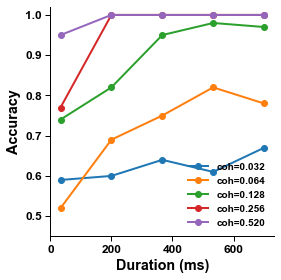

In [19]:
import matplotlib.pyplot as plt

label = [f'coh={i:.3f}' for i in coh]
fig = plt.figure(figsize=(4,4))
for iCoh, dd in enumerate(coh):
    plt.plot(dur*1000/30, acc[iCoh,:], '-o', label=label[iCoh])
# Note here we convert stimulus duration from frame to milliseconds, duration * 1000/30 assuming 30hz refresh rate of a computer monitor 
# 
plt.legend()
plt.ylim([0.45, 1.02])
plt.xlabel('Duration (ms)')
plt.ylabel('Accuracy')

Do the results look exactly similar to those reported in literature??

Cool. Our fake subject behaves similar to subjects in real experiments. 

## Summary
1. The subject makes a decision by counting dots moving to left/right
2. In real experiments, we test many coherence levels and many stimulus durations in many trials